## Milestone 2 code

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:

train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [4]:
ds_train_orig=pd.read_csv(train_url,header=None, names = col_names)
ds_test_orig=pd.read_csv(test_url, header=None, names = col_names)

In [6]:
ds_train = pd.read_csv(train_url,header=None, names = col_names)


ds_test = pd.read_csv(test_url, header=None, names = col_names)

In [7]:
###pose as binary probelm  ####convert multiclass in to binary class problem
ds_train.loc[(ds_train.label != 'normal'),'label']='attack'


In [8]:
ds_test.loc[(ds_test.label != 'normal'),'label']='attack'

In [9]:
ds_test.label.value_counts()

attack    12833
normal     9711
Name: label, dtype: int64

In [12]:
#ds_train

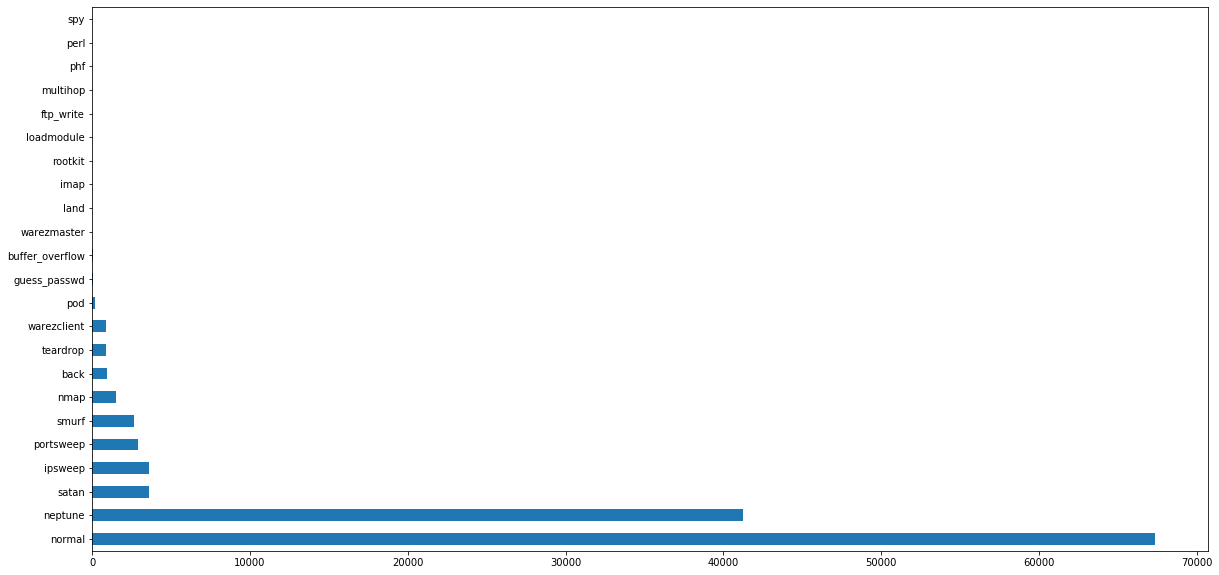

In [10]:
##### multiclass
import matplotlib.pyplot as plt
ds_train_orig['label'].value_counts().head(25).plot(kind='barh', figsize=(20,10))

In [ ]:
#######Binary class
### train data visualization

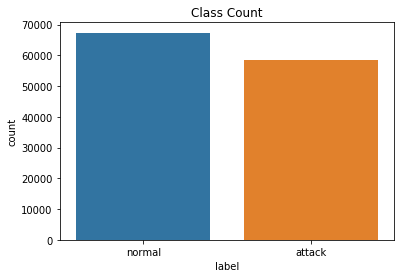

In [11]:
###count of each class distribution 
Y=ds_train
ax = sns.countplot(x='label', data=Y)
plt.rcParams['figure.figsize']=(5,4)
plt.title("Class Count")
plt.show()


In [12]:
## percentage distribution

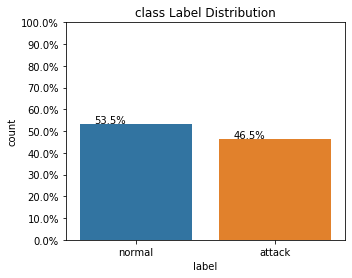

In [13]:
total = len(Y)*1.
ax=sns.countplot(x="label", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.title("class Label Distribution")
plt.rcParams['figure.figsize']=(5,4)
plt.show()


In [17]:
####test data visualization


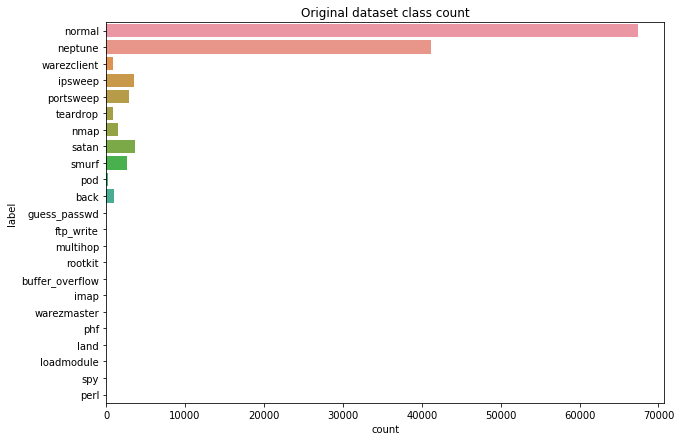

In [15]:
Y=ds_train_orig
ax = sns.countplot(y='label', data=Y)
plt.rcParams['figure.figsize']=(10,17)
plt.title("Original dataset class count")
plt.show()

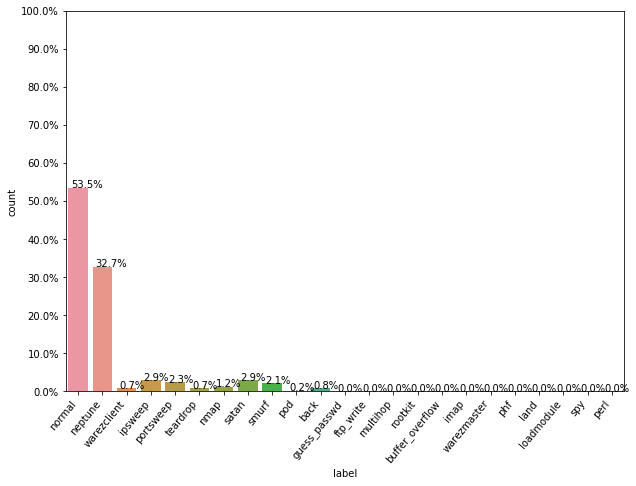

<Figure size 1296x1152 with 0 Axes>

In [296]:
total = len(Y)*1.
ax=sns.countplot(x="label", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
plt.figure(figsize=(18, 16))
#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
#plt.title("Original dataset class distribution")
#plt.tight_layout()
#plt.title("Original dataset class distribution")
plt.show()

In [71]:
ds_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [18]:
from sklearn import preprocessing 
for f in ds_train.columns: 
    if ds_train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(ds_train[f].values)) 
        ds_train[f] = label.transform(list(ds_train[f].values))
ds_train.fillna((-999), inplace=True) 
#ds_train=np.array(ds_train) 
ds_train = ds_train.astype(float)

In [19]:
from sklearn import preprocessing 
for f in ds_test.columns: 
    if ds_test[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(ds_test[f].values)) 
        ds_test[f] = label.transform(list(ds_test[f].values))
ds_test.fillna((-999), inplace=True) 
#ds_test=np.array(ds_test) 
ds_test = ds_test.astype(float)

#### with out Normalization 

In [43]:
X_train=ds_train.drop("label",axis=1)
y_train=ds_train['label']
X_test=ds_test.drop("label",axis=1)
y_test=ds_test['label']

In [44]:
#########Multivariate analysis of datset using T-SNE
# from sklearn.manifold import TSNE
# #import cudf
# #from cuml.manifold import TSNE
# xtsne=TSNE(perplexity=30)
# dims=xtsne.fit_transform(X_train)
# vis_x = dims[:, 0] ####first priniciple component
# vis_y = dims[:, 1] #####second principle component
# plt.scatter(vis_x, vis_y, c=y_train, cmap=plt.cm.get_cmap("jet", 2))
# plt.colorbar(ticks=range(2))
# plt.clim(0.5, 2)
# plt.show()

### Lgbm


In [45]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
y_pred_lgb1 = model_lgbm.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred_lgb1)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred_lgb1)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred_lgb1)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_lgb1)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_lgb1)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_lgb1]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.797152235628105
f1-acore: 0.8044807388088416
confusion matrix:
 [[8563 4270]
 [ 303 9408]]
Precision: 0.6878198567041965
Recall_score: 0.9687982700030893
Misclassified : 4573


### XGBOOST

In [47]:
%%time
model =XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred_sgb1 = model.predict(X_test)

Wall time: 13.4 s


In [48]:
accuracy = accuracy_score(y_test, y_pred_sgb1)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred_sgb1)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred_sgb1)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_sgb1)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_sgb1)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_sgb1]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7812278211497516
f1-acore: 0.792563930013459
confusion matrix:
 [[8190 4643]
 [ 289 9422]]
Precision: 0.6698897973693566
Recall_score: 0.9702399340953558
Misclassified : 4932


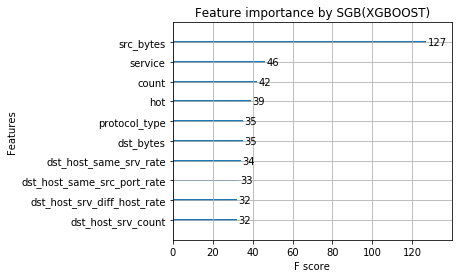

In [49]:

from xgboost import plot_importance
#plot_importance(model,max_num_features=15,)
#plot_importance(model)
plot_importance(model, ax=None, height=0.1, xlim=None, ylim=None, title='Feature importance by SGB(XGBOOST)', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=10, grid=True,)
#pyplot.show()

In [50]:
ds_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [51]:
### XGBOOST with 10 features

In [52]:
ds_train10=ds_train[['src_bytes','service', 'count','protocol_type','dst_bytes','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','hot','dst_host_srv_count','label']]

ds_test10=ds_test[['src_bytes','service', 'count','protocol_type','dst_bytes','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','hot','dst_host_srv_count','label']]





In [53]:
X_train=ds_train10.drop("label",axis=1)
y_train=ds_train10['label']
X_test=ds_test10.drop("label",axis=1)
y_test=ds_test10['label']

In [54]:
%%time
model =XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred_sgb10 = model.predict(X_test)

Wall time: 5.41 s


In [55]:
accuracy = accuracy_score(y_test, y_pred_sgb10)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred_sgb10)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred_sgb10)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_sgb10)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_sgb10)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_sgb10]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7744410929737402
f1-acore: 0.7873185829603915
confusion matrix:
 [[8047 4786]
 [ 299 9412]]
Precision: 0.6629102690519791
Recall_score: 0.9692101740294511
Misclassified : 5085


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=0,n_jobs=-1)
model.fit(X_train, y_train)
print(model)
y_pred_rf = model.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [57]:

accuracy = accuracy_score(y_test, y_pred_rf)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred_rf)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred_rf)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_rf)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_rf)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_rf]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7645936834634492
f1-acore: 0.7806571605703658
confusion matrix:
 [[7793 5040]
 [ 267 9444]]
Precision: 0.652029826014913
Recall_score: 0.972505406240346
Misclassified : 5307


In [58]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[0:10]

,importance
src_bytes,0.291078
dst_bytes,0.225734
dst_host_srv_count,0.167412
count,0.087067
dst_host_diff_srv_rate,0.076832
protocol_type,0.038714
service,0.037294
dst_host_same_src_port_rate,0.034038
dst_host_srv_diff_host_rate,0.027541
hot,0.014290


### Naive Bayes

In [59]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#from sklearn.neighbors import KNeighborsClassifier
model=BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_nb = model.predict(X_test)

Wall time: 123 ms


In [60]:


#predictions = [round(value) for value in y_pred]

In [61]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred_nb)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred_nb)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_nb)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_nb)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_nb]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7850869410929737
f1-acore: 0.7912987292698687
confusion matrix:
 [[8514 4319]
 [ 526 9185]]
Precision: 0.6801688388625592
Recall_score: 0.9458346205334157
Misclassified : 4845


#### Logistic regression without normalization

In [62]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.1,random_state=0)
model.fit(X_train, y_train)


C:\Users\deven\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.70125088715401
f1-acore: 0.7206669155157397
confusion matrix:
 [[7121 5712]
 [1023 8688]]
Precision: 0.6033333333333334
Recall_score: 0.8946555452579549
Misclassified : 6735


### Normalization

In [66]:
####Normalization
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
trainX = scaler.transform(X_train)

scaler = Normalizer().fit(X_test)
testX = scaler.transform(X_test)


X_train = np.array(trainX)
y_train = np.array(y_train)

X_test = np.array(testX)
y_test = np.array(y_test)


### Multivariate Analysis T-SNE

In [68]:
# #########Multivariate analysis of datset using T-SNE
# from sklearn.manifold import TSNE
# xtsne=TSNE(perplexity=50)
# dims=xtsne.fit_transform(X_train)
# vis_x = dims[:, 0] ####first priniciple component
# vis_y = dims[:, 1] #####second principle component
# plt.scatter(vis_x, vis_y, c=y_train, cmap=plt.cm.get_cmap("jet", 2))
# plt.colorbar(ticks=range(10))
# plt.clim(0.5, 9)
# plt.show()

C:\Users\deven\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


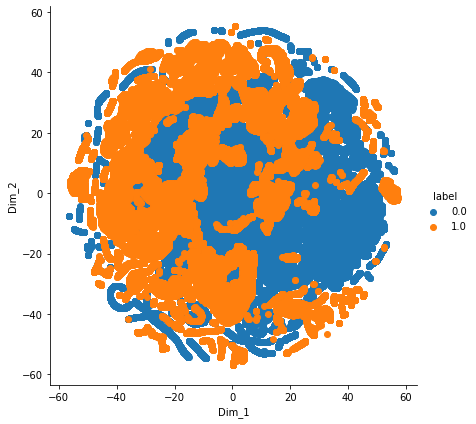

In [88]:
from sklearn.manifold import TSNE
import seaborn as sn
# Picking the top 1000 points as TSNE takes a lot of time for 15K points
#data_1000 = X_train[0:20000,:]
#labels_1000 = y_train[0:20000]
data_1000 = X_train
labels_1000 = y_train


model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### logistic regression with Normalization

In [69]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=0.1,random_state=0)
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

C:\Users\deven\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred_lr)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred_lr)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_lr)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_lr)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_lr]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7102555003548616
f1-acore: 0.7331917327015768
confusion matrix:
 [[7037 5796]
 [ 736 8975]]
Precision: 0.6076095051113669
Recall_score: 0.9242096591494182
Misclassified : 6532


### KNN

In [71]:

%%time
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=-1)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)

Wall time: 9.62 s


In [72]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred_knn)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred_knn)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_knn)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_knn)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_knn]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7638396025550035
f1-acore: 0.7727311534192778
confusion matrix:
 [[8169 4664]
 [ 660 9051]]
Precision: 0.6599343784177908
Recall_score: 0.9320358356502935
Misclassified : 5324


### XGBOOST

In [73]:



%%time
model =XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred_sgb = model.predict(X_test)

Wall time: 10.6 s


In [74]:
y_pred_sgb = model.predict(X_test)

In [75]:

accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.70125088715401
f1-acore: 0.7206669155157397
confusion matrix:
 [[7121 5712]
 [1023 8688]]
Precision: 0.6033333333333334
Recall_score: 0.8946555452579549
Misclassified : 6735


### LGBM

In [76]:
import lightgbm as lgb
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
y_pred_lgb = model_lgbm.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred_lgb)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred_lgb)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred_lgb)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_lgb)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_lgb)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_lgb]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7667228530872959
f1-acore: 0.781847596133903
confusion matrix:
 [[7861 4972]
 [ 287 9424]]
Precision: 0.6546262850791886
Recall_score: 0.9704458861085367
Misclassified : 5259


### SVM

In [78]:
from sklearn.svm import SVC
modell=SVC(gamma='auto')
model.fit(X_train,y_train)
y_pred_svm=model.predict(X_test)


In [79]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("accuracy:",accuracy)

f1score=f1_score(y_test, y_pred_svm)
print("f1-acore:",f1score)

cm=confusion_matrix(y_test, y_pred_svm)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred_svm)
print("Precision:",pr)
rs=recall_score(y_test,y_pred_svm)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred_svm]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 0.7647711142654364
f1-acore: 0.7804413530410301
confusion matrix:
 [[7816 5017]
 [ 286 9425]]
Precision: 0.6526104417670683
Recall_score: 0.9705488621151271
Misclassified : 5303


### Multiple ROC in Single PLot

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'pred': y_pred_lr,
    'model': LogisticRegression(),
},
{
    'label': 'Stochastic Gradient Boosting',
    'pred': y_pred_sgb1,
    'model': XGBClassifier(),
    
},
    {
    'label': 'KNN',
    'pred': y_pred_knn,
    'model':KNeighborsClassifier(n_neighbors=6,algorithm='kd_tree',n_jobs=-1) ,
        
},
    {
    'label': 'Random Forest',
    'pred': y_pred_rf,
    'model': RandomForestClassifier(n_estimators=100,max_depth=6,random_state=0,n_jobs=-1),
},
    {
    'label': 'LGBM',
    'pred': y_pred_lgb1,
    'model': lgb.LGBMClassifier(),
},
 {
    'label': 'Naive Bayes',
    'pred': y_pred_nb,
    'model': BernoulliNB(),
}
 
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds =  roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc =  roc_auc_score(y_test,m['pred'])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
